In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,733 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and d

# 문제1

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
Q1_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/빅분기실기/mtcars.csv')

In [ ]:
target_col = pd.DataFrame(Q1_df['qsec'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
result_col = scaler.fit_transform(Q1_df['qsec'].values.reshape(-1,1))

In [ ]:
sum(result_col>0.5)

array([9])

In [ ]:
result = len(result_col[result_col>0.5])
print(result)

9


# 문제2

In [ ]:
train_x = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/빅분기실기/X_train.csv', encoding='CP949')
train_y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/빅분기실기/y_train.csv', encoding='CP949')
test_x = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/빅분기실기/X_test.csv', encoding='CP949')

## 데이터 확인

In [ ]:
train_x.head(5)

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


In [ ]:
test_x.head(5)

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26
1,3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3
2,3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3
3,3503,7594080,5225000,NaN,주방용품,부산본점,5,2.000000,0.000000,47
4,3504,1795790,1411200,NaN,수산품,청량리점,3,2.666667,0.125000,8


In [ ]:
print("{}의 shape: {}".format('train_x', train_x.shape))
print("{}의 shape: {}".format('train_y', train_y.shape))
print("{}의 shape: {}".format('test_x', test_x.shape))

train_x의 shape: (3500, 10)
train_y의 shape: (3500, 2)
test_x의 shape: (2482, 10)


In [ ]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     1205 non-null   float64
 4   주구매상품    3500 non-null   object 
 5   주구매지점    3500 non-null   object 
 6   내점일수     3500 non-null   int64  
 7   내점당구매건수  3500 non-null   float64
 8   주말방문비율   3500 non-null   float64
 9   구매주기     3500 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 273.6+ KB


In [ ]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2482 entries, 0 to 2481
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cust_id  2482 non-null   int64  
 1   총구매액     2482 non-null   int64  
 2   최대구매액    2482 non-null   int64  
 3   환불금액     871 non-null    float64
 4   주구매상품    2482 non-null   object 
 5   주구매지점    2482 non-null   object 
 6   내점일수     2482 non-null   int64  
 7   내점당구매건수  2482 non-null   float64
 8   주말방문비율   2482 non-null   float64
 9   구매주기     2482 non-null   int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 194.0+ KB


In [ ]:
train_x['주구매지점'].value_counts()

본  점     1077
잠실점       474
분당점       436
부산본점      245
영등포점      241
일산점       198
강남점       145
광주점       114
노원점        90
청량리점       86
대전점        70
미아점        69
부평점        57
동래점        49
관악점        46
인천점        34
안양점        29
포항점        11
대구점         7
울산점         6
센텀시티점       6
전주점         5
창원점         4
상인점         1
Name: 주구매지점, dtype: int64

In [ ]:
train_x['주구매상품'].value_counts()

기타        595
가공식품      546
농산물       339
화장품       264
시티웨어      213
디자이너      193
수산품       153
캐주얼       101
명품        100
섬유잡화       98
골프         82
스포츠        69
일용잡화       64
모피/피혁      57
육류         57
남성 캐주얼     55
구두         54
건강식품       47
차/커피       44
아동         40
피혁잡화       40
축산가공       35
주방용품       32
셔츠         30
젓갈/반찬      29
주방가전       26
트래디셔널      23
남성정장       22
생활잡화       15
주류         14
가구         10
커리어         9
대형가전        8
란제리/내의      8
식기          7
액세서리        5
침구/수예       4
통신/컴퓨터      3
보석          3
악기          2
남성 트랜디      2
소형가전        2
Name: 주구매상품, dtype: int64

환불금액은 null 값이 있으므로 처리해야될 필요가 있다.
환불여부 컬럼을 생성하고 환불금액이 nan 인 경우에 환불여부 컬럼에 0, 환불한 이력이 있으면 1을 넣는다.
이후 환불금액의 nan 값을 0으로 치환.

In [ ]:
train_x['환불여부'] = 1
test_x['환불여부'] = 1

In [ ]:
train_x.loc[(train_x['환불금액'].isna()), '환불여부'] = 0
test_x.loc[(test_x['환불금액'].isna()), '환불여부'] = 0

In [ ]:
train_x['환불금액'].fillna(0, inplace=True)
test_x['환불금액'].fillna(0, inplace=True)

## 모든 컬럼들의 산점도를 확인해보자.

In [ ]:
train_x.columns

Index(['cust_id', '총구매액', '최대구매액', '환불금액', '주구매상품', '주구매지점', '내점일수', '내점당구매건수',
       '주말방문비율', '구매주기', '환불여부'],
      dtype='object')

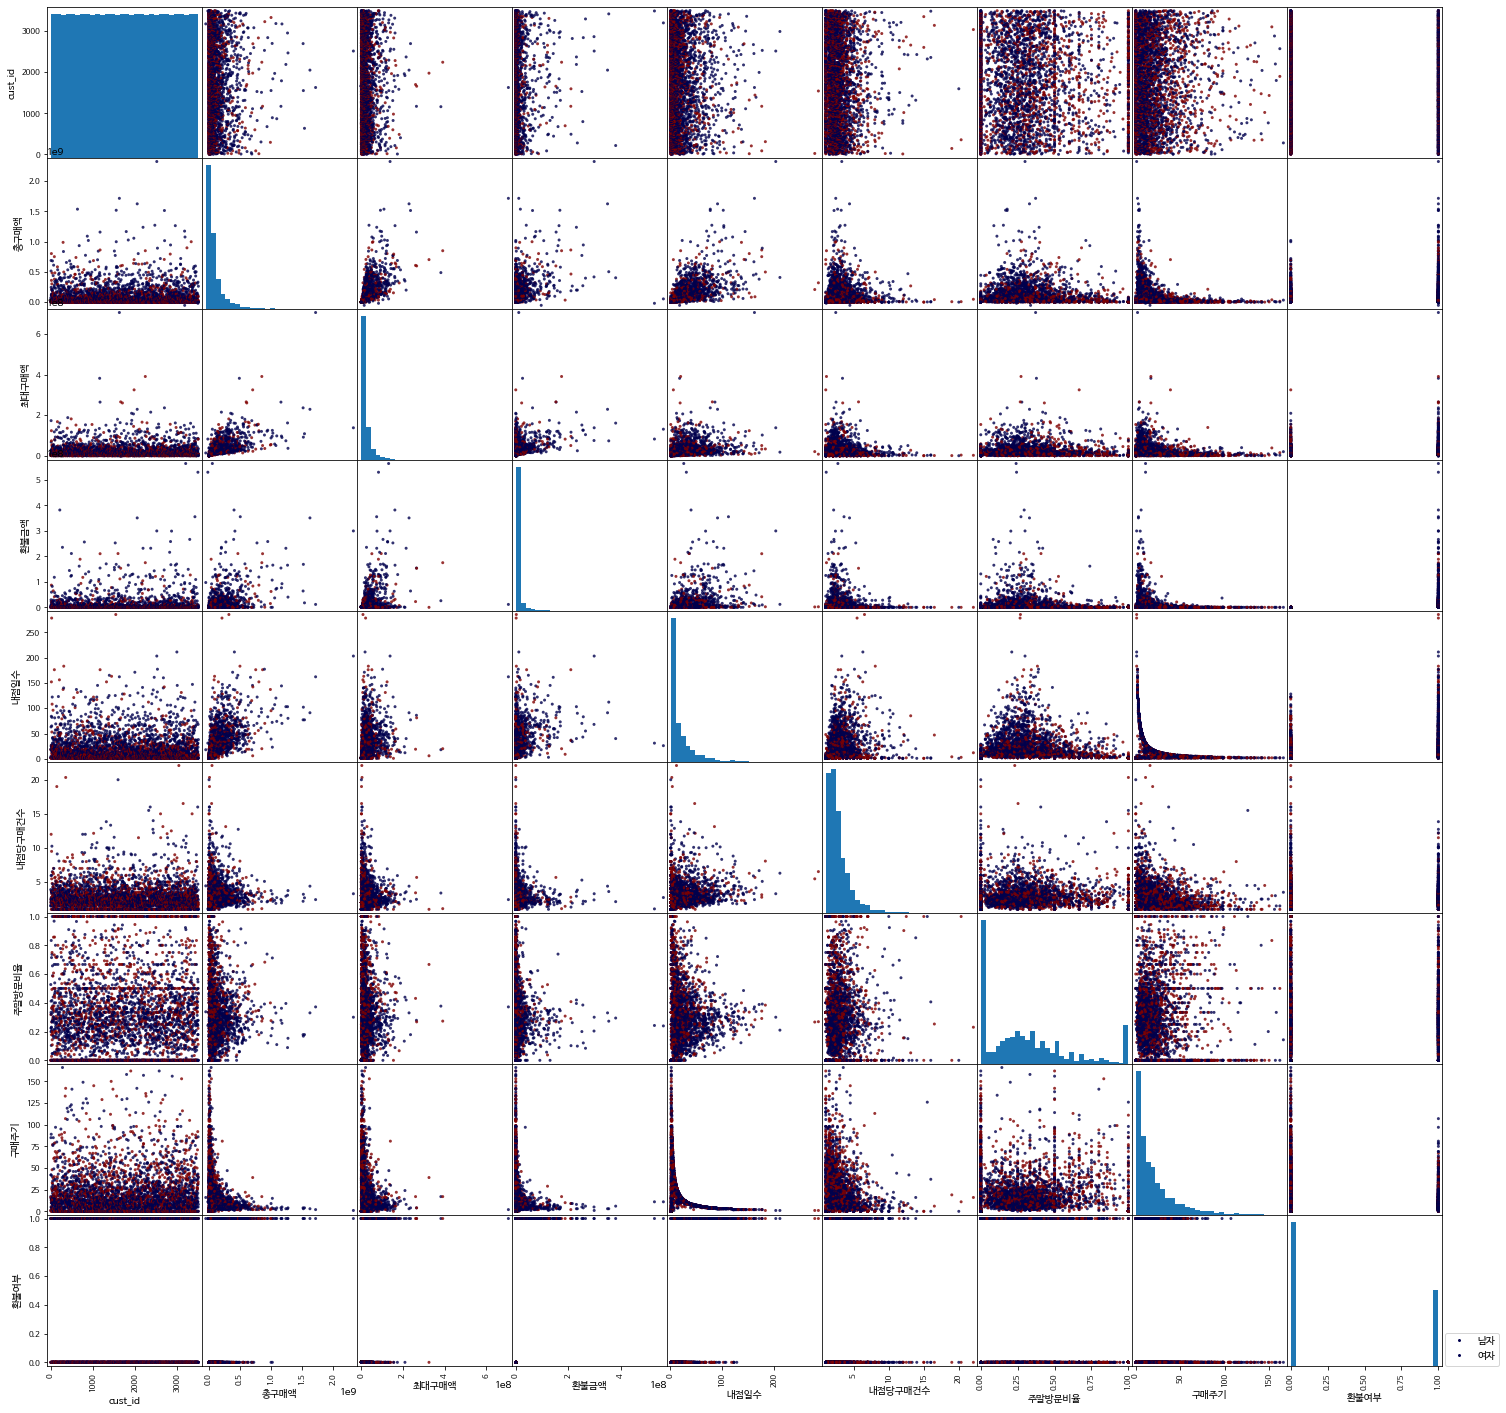

In [ ]:
pp = pd.plotting.scatter_matrix(
    train_x, c=train_y['gender'], figsize=(25, 25), label=[0,1], marker='.', 
    hist_kwds={'bins':30}, alpha=0.8, cmap='seismic', grid=True)
# plt.cm.get_cmap('rainbow', 2)
handles = [plt.plot([], [], color=plt.cm.seismic(0), ls="", marker=".", markersize=np.sqrt(15))[0],
           plt.plot([], [], color=plt.cm.seismic(1), ls="", marker=".", markersize=np.sqrt(15))[0]]
labels = ['남자', '여자']
plt.legend(handles, labels, loc=(1.02, 0))
plt.show()
# grr = pd.scatter_matrix(
# dataframe[columns], c=dataframe["c"], figsize=(7,5), label=['B','N','O'], marker='.',
#     hist_kwds={'bins':20}, s=10, alpha=.8, cmap='brg')

# handles = [plt.plot([],[],color=plt.cm.brg(i/2.), ls="", marker=".", \
#                     markersize=np.sqrt(10))[0] for i in range(3)]
# labels=["Label A", "Label B", "Label C"]
# plt.legend(handles, labels, loc=(1.02,0))
# plt.show()

## 상관계수를 확인해보자

In [ ]:
train_total = pd.concat([train_x, train_y.drop(columns=['cust_id'])], axis=1)

In [ ]:
corr_df = train_total.corr(method='pearson')
corr_df.style.background_gradient(cmap='coolwarm')

,cust_id,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,환불여부,gender
cust_id,1.000000,-0.008004,-0.005883,0.033116,-0.025234,-0.004840,0.001900,0.020070,-0.013090,-0.001994
총구매액,-0.008004,1.000000,0.700080,0.467686,0.659084,0.090022,0.014396,-0.212944,0.403357,-0.150141
최대구매액,-0.005883,0.700080,1.000000,0.429504,0.374147,0.018980,0.022277,-0.115837,0.330687,-0.114323
환불금액,0.033116,0.467686,0.429504,1.000000,0.377570,-0.003871,-0.024707,-0.137362,0.380108,-0.114327
내점일수,-0.025234,0.659084,0.374147,0.377570,1.000000,0.225264,-0.010325,-0.293200,0.498958,-0.155000
내점당구매건수,-0.004840,0.090022,0.018980,-0.003871,0.225264,1.000000,0.007659,-0.091151,0.063000,-0.043917
주말방문비율,0.001900,0.014396,0.022277,-0.024707,-0.010325,0.007659,1.000000,0.003372,-0.008775,0.073598
구매주기,0.020070,-0.212944,-0.115837,-0.137362,-0.293200,-0.091151,0.003372,1.000000,-0.204851,0.041450
환불여부,-0.013090,0.403357,0.330687,0.380108,0.498958,0.063000,-0.008775,-0.204851,1.000000,-0.202456
gender,-0.001994,-0.150141,-0.114323,-0.114327,-0.155000,-0.043917,0.073598,0.041450,-0.202456,1.000000


In [ ]:
corr_df['gender'].sort_values()

환불여부      -0.202456
내점일수      -0.155000
총구매액      -0.150141
환불금액      -0.114327
최대구매액     -0.114323
내점당구매건수   -0.043917
cust_id   -0.001994
구매주기       0.041450
주말방문비율     0.073598
gender     1.000000
Name: gender, dtype: float64

## 수치형 데이터 min-max scaler

In [ ]:
train_x = train_x.set_index('cust_id')
cat_col = ['주구매상품','주구매지점', '환불여부']
num_col = train_x.columns.drop(cat_col).tolist()
train_x_numeric = train_x[num_col].copy()
train_x_categorical = train_x[cat_col].copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_x_scaled = scaler.fit_transform(train_x_numeric)
train_x_numeric_scaled = pd.DataFrame(train_x_scaled, index=train_x_numeric.index, columns=train_x_numeric.columns)

In [ ]:
train_x_numeric_scaled

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
cust_id,,,,,,,
0,0.050810,0.020090,0.012168,0.063380,0.137300,0.527027,0.102410
1,0.022966,0.007226,0.000532,0.003521,0.023715,0.000000,0.006024
2,0.023412,0.006526,0.000000,0.003521,0.047431,0.000000,0.006024
3,0.028834,0.011171,0.000000,0.059859,0.068511,0.318182,0.096386
4,0.034295,0.038037,0.000000,0.003521,0.023715,0.000000,0.512048
...,...,...,...,...,...,...,...
3495,0.023403,0.008504,0.000000,0.000000,0.047431,1.000000,0.000000
3496,0.034539,0.014363,0.010731,0.024648,0.029644,0.461538,0.240964
3497,0.022098,0.004322,0.000000,0.000000,0.000000,0.000000,0.000000


## 카테고리컬 데이터 onehot-encoder

In [ ]:
print('원본특성:\n', list(train_x_categorical.columns), "\n")
print('총 갯수', len(train_x_categorical.columns))
train_x_categorical_dummies = pd.get_dummies(train_x_categorical)
print('get_dummies 후의 특성 : \n', list(train_x_categorical_dummies.columns))
print('총 갯수', len(train_x_categorical_dummies.columns))

원본특성:
 ['주구매상품', '주구매지점', '환불여부'] 

총 갯수 3
get_dummies 후의 특성 : 
 ['환불여부', '주구매상품_가공식품', '주구매상품_가구', '주구매상품_건강식품', '주구매상품_골프', '주구매상품_구두', '주구매상품_기타', '주구매상품_남성 캐주얼', '주구매상품_남성 트랜디', '주구매상품_남성정장', '주구매상품_농산물', '주구매상품_대형가전', '주구매상품_디자이너', '주구매상품_란제리/내의', '주구매상품_명품', '주구매상품_모피/피혁', '주구매상품_보석', '주구매상품_생활잡화', '주구매상품_섬유잡화', '주구매상품_셔츠', '주구매상품_소형가전', '주구매상품_수산품', '주구매상품_스포츠', '주구매상품_시티웨어', '주구매상품_식기', '주구매상품_아동', '주구매상품_악기', '주구매상품_액세서리', '주구매상품_육류', '주구매상품_일용잡화', '주구매상품_젓갈/반찬', '주구매상품_주류', '주구매상품_주방가전', '주구매상품_주방용품', '주구매상품_차/커피', '주구매상품_축산가공', '주구매상품_침구/수예', '주구매상품_캐주얼', '주구매상품_커리어', '주구매상품_통신/컴퓨터', '주구매상품_트래디셔널', '주구매상품_피혁잡화', '주구매상품_화장품', '주구매지점_강남점', '주구매지점_관악점', '주구매지점_광주점', '주구매지점_노원점', '주구매지점_대구점', '주구매지점_대전점', '주구매지점_동래점', '주구매지점_미아점', '주구매지점_본  점', '주구매지점_부산본점', '주구매지점_부평점', '주구매지점_분당점', '주구매지점_상인점', '주구매지점_센텀시티점', '주구매지점_안양점', '주구매지점_영등포점', '주구매지점_울산점', '주구매지점_인천점', '주구매지점_일산점', '주구매지점_잠실점', '주구매지점_전주점', '주구매지점_창원점', '주구매지점_청량리점', '주구매지점_포항점']
총 갯수 67


In [ ]:
train_x_categorical_dummies

,환불여부,주구매상품_가공식품,주구매상품_가구,주구매상품_건강식품,주구매상품_골프,주구매상품_구두,주구매상품_기타,주구매상품_남성 캐주얼,주구매상품_남성 트랜디,주구매상품_남성정장,주구매상품_농산물,주구매상품_대형가전,주구매상품_디자이너,주구매상품_란제리/내의,주구매상품_명품,주구매상품_모피/피혁,주구매상품_보석,주구매상품_생활잡화,주구매상품_섬유잡화,주구매상품_셔츠,주구매상품_소형가전,주구매상품_수산품,주구매상품_스포츠,주구매상품_시티웨어,주구매상품_식기,주구매상품_아동,주구매상품_악기,주구매상품_액세서리,주구매상품_육류,주구매상품_일용잡화,주구매상품_젓갈/반찬,주구매상품_주류,주구매상품_주방가전,주구매상품_주방용품,주구매상품_차/커피,주구매상품_축산가공,주구매상품_침구/수예,주구매상품_캐주얼,주구매상품_커리어,주구매상품_통신/컴퓨터,주구매상품_트래디셔널,주구매상품_피혁잡화,주구매상품_화장품,주구매지점_강남점,주구매지점_관악점,주구매지점_광주점,주구매지점_노원점,주구매지점_대구점,주구매지점_대전점,주구매지점_동래점,주구매지점_미아점,주구매지점_본 점,주구매지점_부산본점,주구매지점_부평점,주구매지점_분당점,주구매지점_상인점,주구매지점_센텀시티점,주구매지점_안양점,주구매지점_영등포점,주구매지점_울산점,주구매지점_인천점,주구매지점_일산점,주구매지점_잠실점,주구매지점_전주점,주구매지점_창원점,주구매지점_청량리점,주구매지점_포항점
cust_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3496,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## scaler, one-hot 처리 후 최종 데이터프레임

In [ ]:
train_x = pd.concat([train_x_numeric_scaled, train_x_categorical_dummies], axis=1)

## 일단 해본 CV 모델링

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer

from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100)


strfold = StratifiedKFold(n_splits=10, shuffle=True)
score = sklearn.metrics.make_scorer(roc_auc_score)
res = cross_val_score(RF_model, train_x, train_y['gender'], cv=strfold, scoring=score)
display(res)

array([0.57964725, 0.56138241, 0.57133396, 0.61556694, 0.58180428,
       0.57193495, 0.60762441, 0.58948429, 0.55049347, 0.55598415])

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()

from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(n_splits=10, random_state=42, n_repeats=5)
scores = cross_val_score(RF_model, train_x, train_y['gender'], cv=rskfold)

print("교차 검증 점수:\n", scores)
print("교차 검증 점수 평균: {:.4f}".format(scores.mean()))

교차 검증 점수:
 [0.62571429 0.67142857 0.64571429 0.66857143 0.66571429 0.62571429
 0.62571429 0.66285714 0.63142857 0.6        0.65142857 0.66285714
 0.64       0.64571429 0.66285714 0.63714286 0.68       0.60571429
 0.66571429 0.67714286 0.60571429 0.64571429 0.66571429 0.61714286
 0.63428571 0.64285714 0.60571429 0.68285714 0.67428571 0.59714286
 0.62857143 0.66571429 0.60571429 0.62571429 0.63142857 0.64285714
 0.62       0.64       0.64285714 0.62285714 0.66285714 0.61428571
 0.61714286 0.66571429 0.65428571 0.66285714 0.64       0.61428571
 0.64285714 0.62857143]
교차 검증 점수 평균: 0.6410


## xgboost

### train_val_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y['gender'], test_size = 0.1, stratify=train_y['gender'] ,random_state=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(3150, 74)
(350, 74)
(3150,)
(350,)


In [ ]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_val, label=y_val)

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'auc',
         }

num_rounds = 200

In [ ]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[0]	train-auc:0.658371	eval-auc:0.611569
[1]	train-auc:0.66196	eval-auc:0.613393
[2]	train-auc:0.675646	eval-auc:0.625817
[3]	train-auc:0.681086	eval-auc:0.622203
[4]	train-auc:0.685	eval-auc:0.630803
[5]	train-auc:0.690706	eval-auc:0.634279
[6]	train-auc:0.69422	eval-auc:0.643922
[7]	train-auc:0.69419	eval-auc:0.644443
[8]	train-auc:0.696688	eval-auc:0.649343
[9]	train-auc:0.697881	eval-auc:0.65089
[10]	train-auc:0.701066	eval-auc:0.654365
[11]	train-auc:0.703813	eval-auc:0.654052
[12]	train-auc:0.704794	eval-auc:0.656537
[13]	train-auc:0.707075	eval-auc:0.657544
[14]	train-auc:0.708983	eval-auc:0.654365
[15]	train-auc:0.711116	eval-auc:0.655251
[16]	train-auc:0.712743	eval-auc:0.655703
[17]	train-auc:0.713672	eval-auc:0.654973
[18]	train-auc:0.71557	eval-auc:0.654382
[19]	train-auc:0.71716	eval-auc:0.656346
[20]	train-auc:0.718262	eval-auc:0.655651
[21]	train-auc:0.718995	eval-auc:0.655807
[22]	train-auc:0.719792	eval-auc:0.65473
[23]	train-auc:0.721229	eval-auc:0.657058
[24]	train-a

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.593 0.497 0.525 0.86  0.244 0.278 0.174 0.252 0.357 0.462]
예측값 10개만 표시:  [1, 0, 1, 1, 0, 0, 0, 0, 0, 0]


In [ ]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(y_val, preds)

오차행렬:
 [[348  89]
 [170  93]]

정확도: 0.6300
정밀도: 0.5110
재현율: 0.3536
F1: 0.4180
AUC: 0.5750


## PCA 해보기

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y['gender'], test_size = 0.1, stratify=train_y['gender'] ,random_state=42)

In [ ]:
fig, axes = plt.subplots(15, 2, figsize=(15, 30))
man = X_train[y_train==1]
woman = X_train[y_train==0]

ax=axes.ravel()

for i in range(30): # X_train.shape[1]
  _, bins = np.histogram(X_train.values[:,i], bins=50)
  ax[i].hist(man.values[:,i], bins=bins, color='blue', alpha=0.5)
  ax[i].hist(woman.values[:,i], bins=bins, color='red', alpha=0.5)
  ax[i].set_title(X_train.columns[i])
  ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["남자", "여자"], loc="best")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
n_com= 10
pca = PCA(n_components=n_com)
pca.fit(X_train)

print("PCA 주성분 형태: ", pca.components_.shape)

PCA 주성분 형태:  (10, 74)


Text(0, 0.5, '주성분')

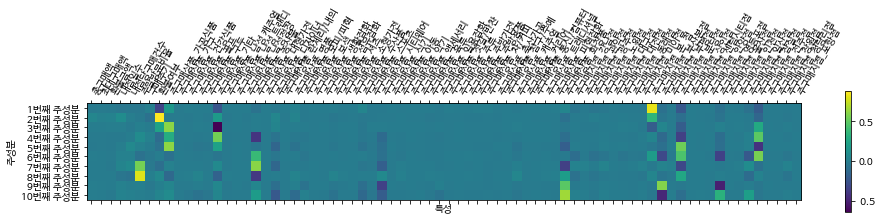

In [ ]:
plt.matshow(pca.components_, cmap='viridis')

components_index= []
for i in range(1,n_com+1):
  components_index += [str(i)+'번째 주성분']
plt.yticks(list(range(n_com)), components_index)
plt.colorbar()
plt.xticks(range(len(train_x.columns)),
                 train_x.columns, rotation=60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

In [ ]:
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

print("X_train_pca.shape:", X_train_pca.shape)

X_train_pca.shape: (3150, 10)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}".format(knn.score(X_val, y_val)))

테스트 세트 정확도: 0.583


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}".format(rf.score(X_val, y_val)))

테스트 세트 정확도: 0.660


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.3f}".format(knn.score(X_val_pca, y_val)))

테스트 세트 정확도: 0.551


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train_pca, y_train)
print("테스트 세트 정확도: {:.3f}".format(rf.score(X_val_pca, y_val)))

테스트 세트 정확도: 0.580
